In [84]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import tarfile
from six.moves import urllib
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import StratifiedShuffleSplit
from pandas.tools.plotting import scatter_matrix

In [44]:
ls

20 Years of Games tutorial.ipynb  Machine learning project.ipynb
datasets/                         Teams.csv
ign.csv                           TourneyDetailedResults.csv
Machine Learning Project 1.ipynb


In [45]:
DATASETS_URL = "https://github.com/ageron/handson-ml/raw/master/datasets"

In [46]:
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DATASETS_URL + "/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.exists(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [47]:
fetch_housing_data()

In [48]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [49]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [50]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [51]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [52]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

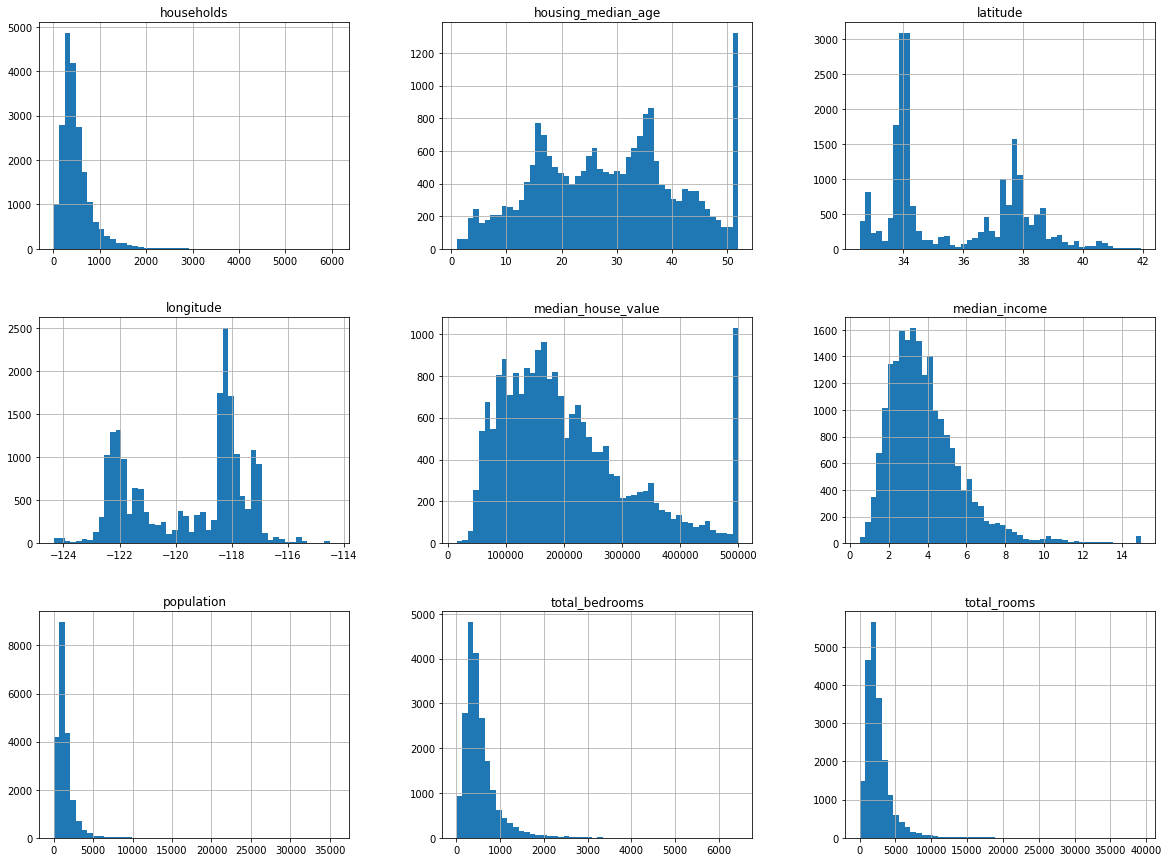

In [53]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

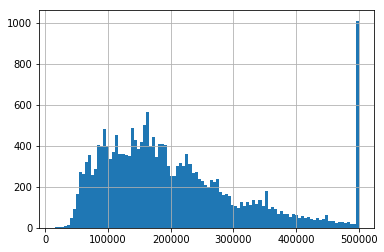

In [54]:
housing.median_house_value.hist(bins=100)

In [55]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [56]:
len(train_set)/len(housing)

0.8

In [57]:
len(housing)

20640

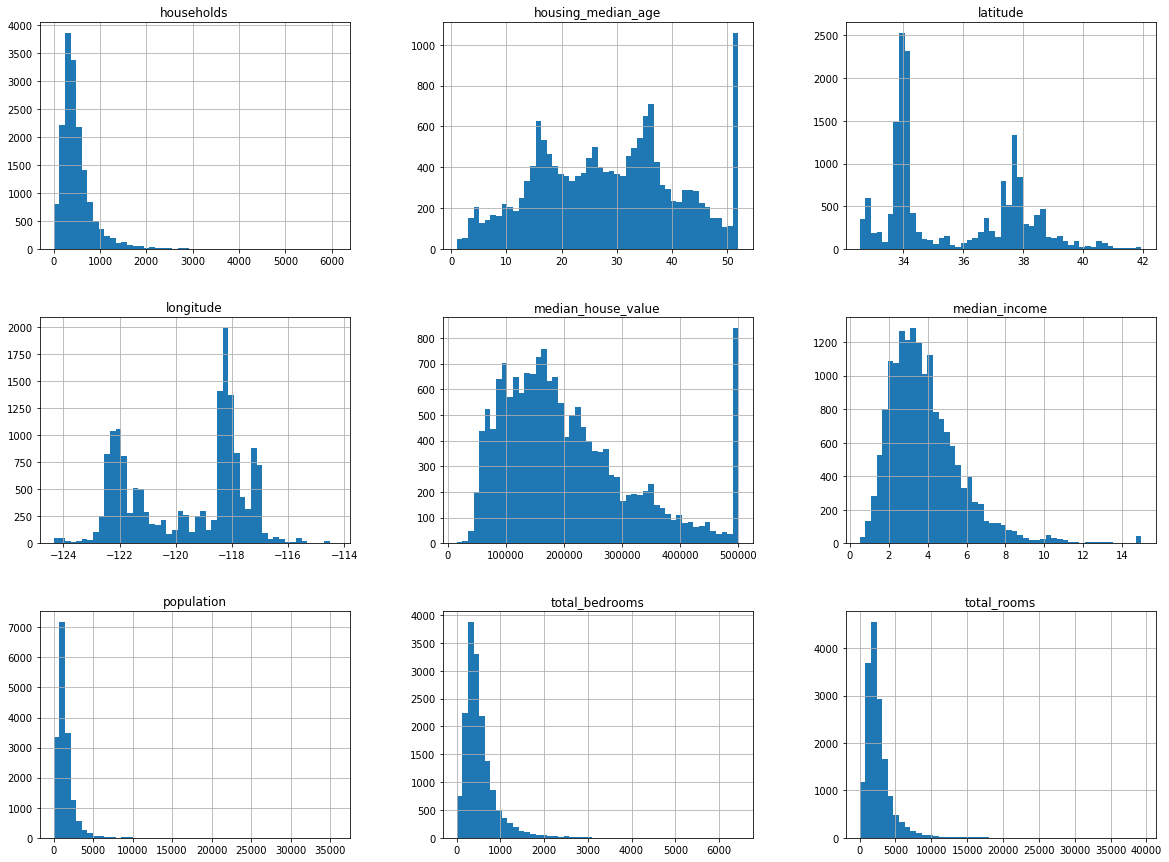

In [58]:
train_set.hist(bins=50, figsize=(20,15))
plt.show()

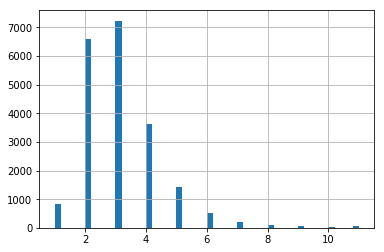

In [59]:
housing['income_cat']= np.ceil(housing['median_income']/1.5)
housing.income_cat.hist(bins=50)


In [96]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household
15939,-122.41,37.73,33.0,2789.0,567.0,1682.0,552.0,3.8643,276200.0,NEAR BAY,3.0,1.658145
8387,-118.36,33.98,39.0,813.0,185.0,344.0,154.0,3.5833,218800.0,<1H OCEAN,3.0,2.363372
20234,-119.27,34.27,44.0,1312.0,279.0,668.0,278.0,4.0900,203800.0,NEAR OCEAN,3.0,1.964072
12291,-116.97,33.93,29.0,2793.0,722.0,1583.0,626.0,1.4240,73200.0,INLAND,1.0,1.764371
14228,-117.04,32.68,14.0,1320.0,270.0,943.0,260.0,5.0947,152700.0,NEAR OCEAN,4.0,1.399788


In [60]:
housing["income_cat"].where(housing["income_cat"]<5,5.0,inplace=True)

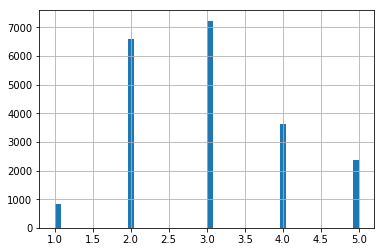

In [61]:
housing.income_cat.hist(bins=50)

In [62]:
split = StratifiedShuffleSplit(housing["income_cat"],test_size=0.2)
train_indicies, test_indicies = next(iter(split))
strat_train_set = housing.loc[train_indicies]
strat_test_set = housing.loc[test_indicies]

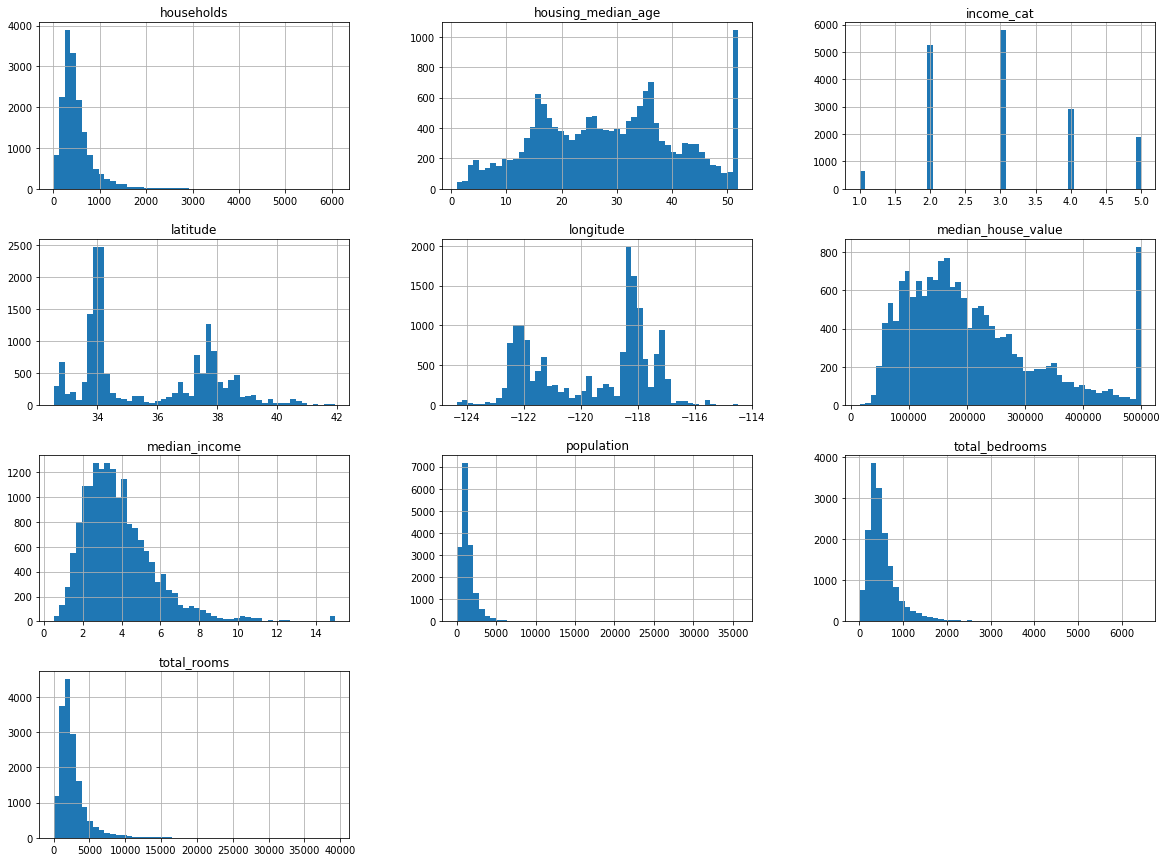

In [63]:
strat_train_set.hist(bins=50,figsize=(20,15))
plt.show()

In [64]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
income_cat            20640 non-null float64
dtypes: float64(10), object(1)
memory usage: 1.7+ MB


In [65]:
housing.income_cat.value_counts()/len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [71]:
housing.income_cat.value_counts()/len(housing)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64

In [69]:
strat_train_set.income_cat.value_counts()/len(strat_train_set)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64

In [67]:
len(housing)

20640

In [70]:
housing = strat_train_set.copy()

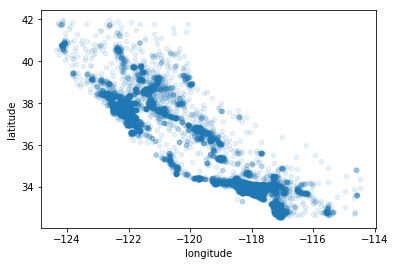

In [73]:
housing.plot(kind="scatter", x = "longitude", y = "latitude", alpha = 0.1)

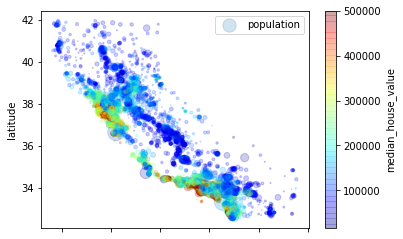

In [80]:
housing.plot(kind="scatter", x = "longitude", y = "latitude", 
             alpha = 0.2, s = housing["population"]/100, label = "population", 
             c = "median_house_value", cmap = plt.get_cmap("jet"),colorbar = True)
plt.legend()

In [78]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat'],
      dtype='object')

In [81]:
corr_matrix = housing.corr()

In [83]:
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687340
income_cat            0.643497
total_rooms           0.131440
housing_median_age    0.103946
households            0.063720
total_bedrooms        0.047009
population           -0.026199
longitude            -0.038944
latitude             -0.150244
Name: median_house_value, dtype: float64

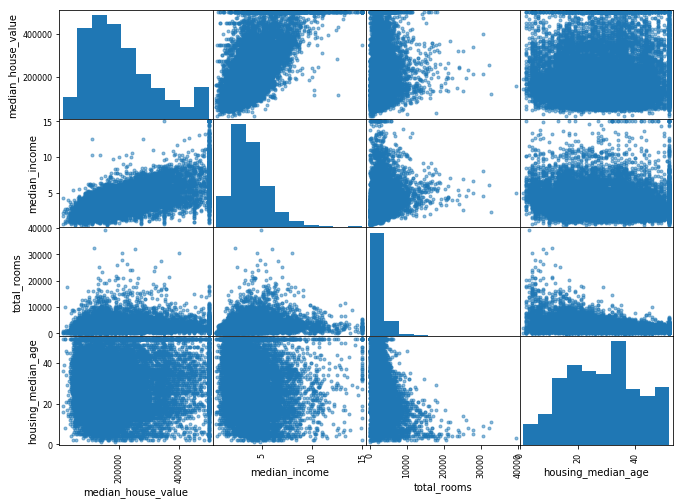

In [87]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(11, 8))
plt.show()

In [88]:
housing["rooms_per_household"] = housing.total_rooms/housing.population

In [89]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household
15939,-122.41,37.73,33.0,2789.0,567.0,1682.0,552.0,3.8643,276200.0,NEAR BAY,3.0,1.658145
8387,-118.36,33.98,39.0,813.0,185.0,344.0,154.0,3.5833,218800.0,<1H OCEAN,3.0,2.363372
20234,-119.27,34.27,44.0,1312.0,279.0,668.0,278.0,4.0900,203800.0,NEAR OCEAN,3.0,1.964072
12291,-116.97,33.93,29.0,2793.0,722.0,1583.0,626.0,1.4240,73200.0,INLAND,1.0,1.764371
14228,-117.04,32.68,14.0,1320.0,270.0,943.0,260.0,5.0947,152700.0,NEAR OCEAN,4.0,1.399788


In [91]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value     1.000000
median_income          0.687340
income_cat             0.643497
rooms_per_household    0.192349
total_rooms            0.131440
housing_median_age     0.103946
households             0.063720
total_bedrooms         0.047009
population            -0.026199
longitude             -0.038944
latitude              -0.150244
Name: median_house_value, dtype: float64

In [94]:
mediantb = housing.total_bedrooms.median()


In [95]:
housing.total_bedrooms.fillna(mediantb)

15939     567.0
8387      185.0
20234     279.0
12291     722.0
14228     270.0
19538    1119.0
10094     518.0
1679      413.0
9281      821.0
16123     386.0
15585     224.0
3058      239.0
3039      713.0
217       307.0
14387     608.0
20118     194.0
19899     508.0
1155      325.0
5884      391.0
19536     328.0
10573     970.0
16870     303.0
14004    1401.0
9968      195.0
13782     698.0
20140      90.0
9026      244.0
18819     356.0
9781      443.0
16159     439.0
          ...  
3030      421.0
7244      591.0
5058      601.0
18176     433.0
19329     314.0
20160      69.0
10765     521.0
19        298.0
9870      586.0
12394    1542.0
5208      198.0
6726      371.0
15401     643.0
4570      788.0
1260     1522.0
13874    1295.0
16080     449.0
347       320.0
16556      26.0
5946      248.0
13865     592.0
931       369.0
14702     642.0
18250     483.0
504       198.0
3471      987.0
8349     1102.0
10572    1915.0
13783     446.0
4786      453.0
Name: total_bedrooms, dt

In [99]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
15939,-122.41,37.73,33.0,2789.0,567.0,1682.0,552.0,3.8643,276200.0,NEAR BAY,3.0
8387,-118.36,33.98,39.0,813.0,185.0,344.0,154.0,3.5833,218800.0,<1H OCEAN,3.0
20234,-119.27,34.27,44.0,1312.0,279.0,668.0,278.0,4.0900,203800.0,NEAR OCEAN,3.0
12291,-116.97,33.93,29.0,2793.0,722.0,1583.0,626.0,1.4240,73200.0,INLAND,1.0
14228,-117.04,32.68,14.0,1320.0,270.0,943.0,260.0,5.0947,152700.0,NEAR OCEAN,4.0


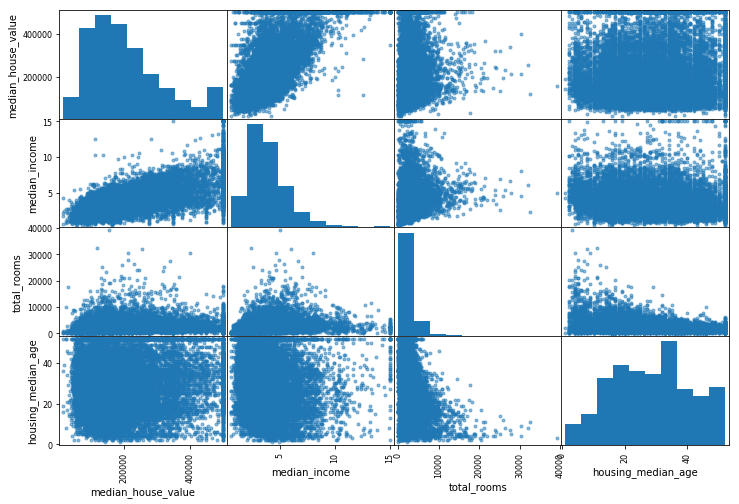

In [100]:
from pandas.tools.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
"housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

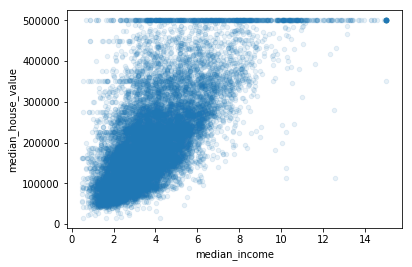

In [101]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
alpha=0.1)

In [102]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["population"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [105]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687340
income_cat                  0.643497
rooms_per_household         0.192349
total_rooms                 0.131440
housing_median_age          0.103946
households                  0.063720
total_bedrooms              0.047009
population_per_household   -0.022033
population                 -0.026199
longitude                  -0.038944
latitude                   -0.150244
bedrooms_per_room          -0.252107
Name: median_house_value, dtype: float64

In [106]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [108]:
housing.drop("total_bedrooms", axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity,income_cat
15939,-122.41,37.73,33.0,2789.0,1682.0,552.0,3.8643,NEAR BAY,3.0
8387,-118.36,33.98,39.0,813.0,344.0,154.0,3.5833,<1H OCEAN,3.0
20234,-119.27,34.27,44.0,1312.0,668.0,278.0,4.0900,NEAR OCEAN,3.0
12291,-116.97,33.93,29.0,2793.0,1583.0,626.0,1.4240,INLAND,1.0
14228,-117.04,32.68,14.0,1320.0,943.0,260.0,5.0947,NEAR OCEAN,4.0
19538,-120.95,37.65,14.0,5200.0,3221.0,1102.0,2.6964,INLAND,2.0
10094,-117.96,33.94,31.0,2397.0,1407.0,476.0,2.6641,<1H OCEAN,2.0
1679,-122.28,38.00,26.0,2335.0,980.0,417.0,3.4471,NEAR BAY,3.0
9281,-122.61,38.09,18.0,6205.0,2311.0,756.0,6.9081,<1H OCEAN,5.0
16123,-122.47,37.78,51.0,1485.0,880.0,385.0,2.7431,NEAR BAY,2.0
